In [1]:
from ensmallen_graph.datasets.linqs import Cora
from embiggen.embedders import TransE

Using TensorFlow backend.


In [2]:
cora = Cora()
cora = cora.filter_from_names(node_type_name_to_filter=["Word"])#.remove_node_types()
cora

The undirected graph Cora has 2708 nodes and 5278 weighted edges, of which none are self-loops. The graph is sparse as it has a density of 0.00144 and has 78 connected components, where the component with most nodes has 2485 nodes and the component with the least nodes has 2 nodes. The graph median node degree is 3, the mean node degree is 3.90, and the node degree mode is 2. The top 5 most central nodes are 35 (degree 168), 6213 (degree 78), 1365 (degree 74), 3229 (degree 65) and 910 (degree 44). The hash of the graph is a7269ea66ba0be06.

In [4]:
cora.link_prediction_ids(0, return_node_types=True, return_edge_types=True)

(array([2206, 1526,  304, ..., 1199,  793, 2595], dtype=uint32),
 array([[    5,     0,   402, ...,     0,     1,     0],
        [    0, 16256,   163, ...,     0,     1,     0],
        [    0,     0,     0, ...,     0,   163,     0],
        ...,
        [    5, 16256,  2261, ...,     0,     1,     1],
        [    5,     0,     0, ...,     0,  2826,     0],
        [    5,     1,     1, ..., 16256,  2275,     0]], dtype=uint16),
 array([2133,  576, 1912, ..., 1598, 1734,  780], dtype=uint32),
 array([[    5, 16256,  2343, ...,     0,     1,     1],
        [    0,     0,     0, ...,     0,  3908,     0],
        [    0,     1,     1, ..., 16256,  2356,     0],
        ...,
        [    4,     0,     0, ...,     0,  1218,     0],
        [    5,     0,     1, ..., 16256,  1060,     0],
        [    0,     0,     1, ...,     0,     0, 16256]], dtype=uint16),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint16),
 array([ True,  True,  True, ..., False,  True, False]))

In [12]:
model = TransE(
    cora,
    distance_metric="L2",
)

In [13]:
history = model.fit()

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [14]:
embedding = model.get_embedding_dataframe()

In [15]:
embedding.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,...,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000
mean,0.247944,0.104203,0.101440,0.016984,0.030440,0.063512,0.015592,-0.003767,-0.022669,-0.004811,...,-0.050051,0.084265,0.038264,-0.046436,-0.038323,-0.245308,0.014593,-0.131019,-0.059454,-0.132914
std,0.231980,0.122914,0.119966,0.103324,0.078827,0.110551,0.048078,0.089585,0.113906,0.114775,...,0.112768,0.122104,0.083212,0.068333,0.081903,0.227559,0.139117,0.162559,0.138443,0.160094
min,-0.585783,-0.360658,-0.374623,-0.433124,-0.318418,-0.412666,-0.233866,-0.427257,-0.439137,-0.511062,...,-0.465850,-0.381441,-0.441479,-0.314892,-0.314368,-0.572370,-0.511172,-0.451848,-0.594663,-0.543166
25%,0.192477,0.059669,0.056925,-0.027952,-0.006743,0.007242,-0.005628,-0.043154,-0.086716,-0.060228,...,-0.119089,0.031938,-0.000331,-0.085635,-0.084935,-0.393449,-0.054810,-0.235395,-0.143214,-0.231432
50%,0.344981,0.146586,0.141255,0.023508,0.042378,0.083631,0.020560,-0.004107,-0.030392,-0.006631,...,-0.062542,0.118631,0.050804,-0.065090,-0.051118,-0.342085,0.017408,-0.181838,-0.077542,-0.184078
75%,0.398880,0.182970,0.178694,0.067485,0.073647,0.130959,0.039994,0.036228,0.040829,0.050825,...,0.008587,0.156308,0.082707,-0.018638,-0.000308,-0.186753,0.085966,-0.070611,0.012224,-0.075954
max,0.612756,0.401292,0.349148,0.397011,0.262883,0.408341,0.217100,0.414060,0.463538,0.447166,...,0.456201,0.426396,0.444362,0.325861,0.336686,0.534524,0.545002,0.457898,0.470694,0.522815


In [16]:
from embiggen import GraphVisualization

visualizer = GraphVisualization(cora)

In [17]:
visualizer.fit_transform_nodes(embedding)

In [23]:
visualizer.fit_transform_edges(embedding, )

In [18]:
visualizer.plot_node_types()

ValueError: The graph does not have node types!

(<Figure size 1400x1400 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcdd9f90610>)

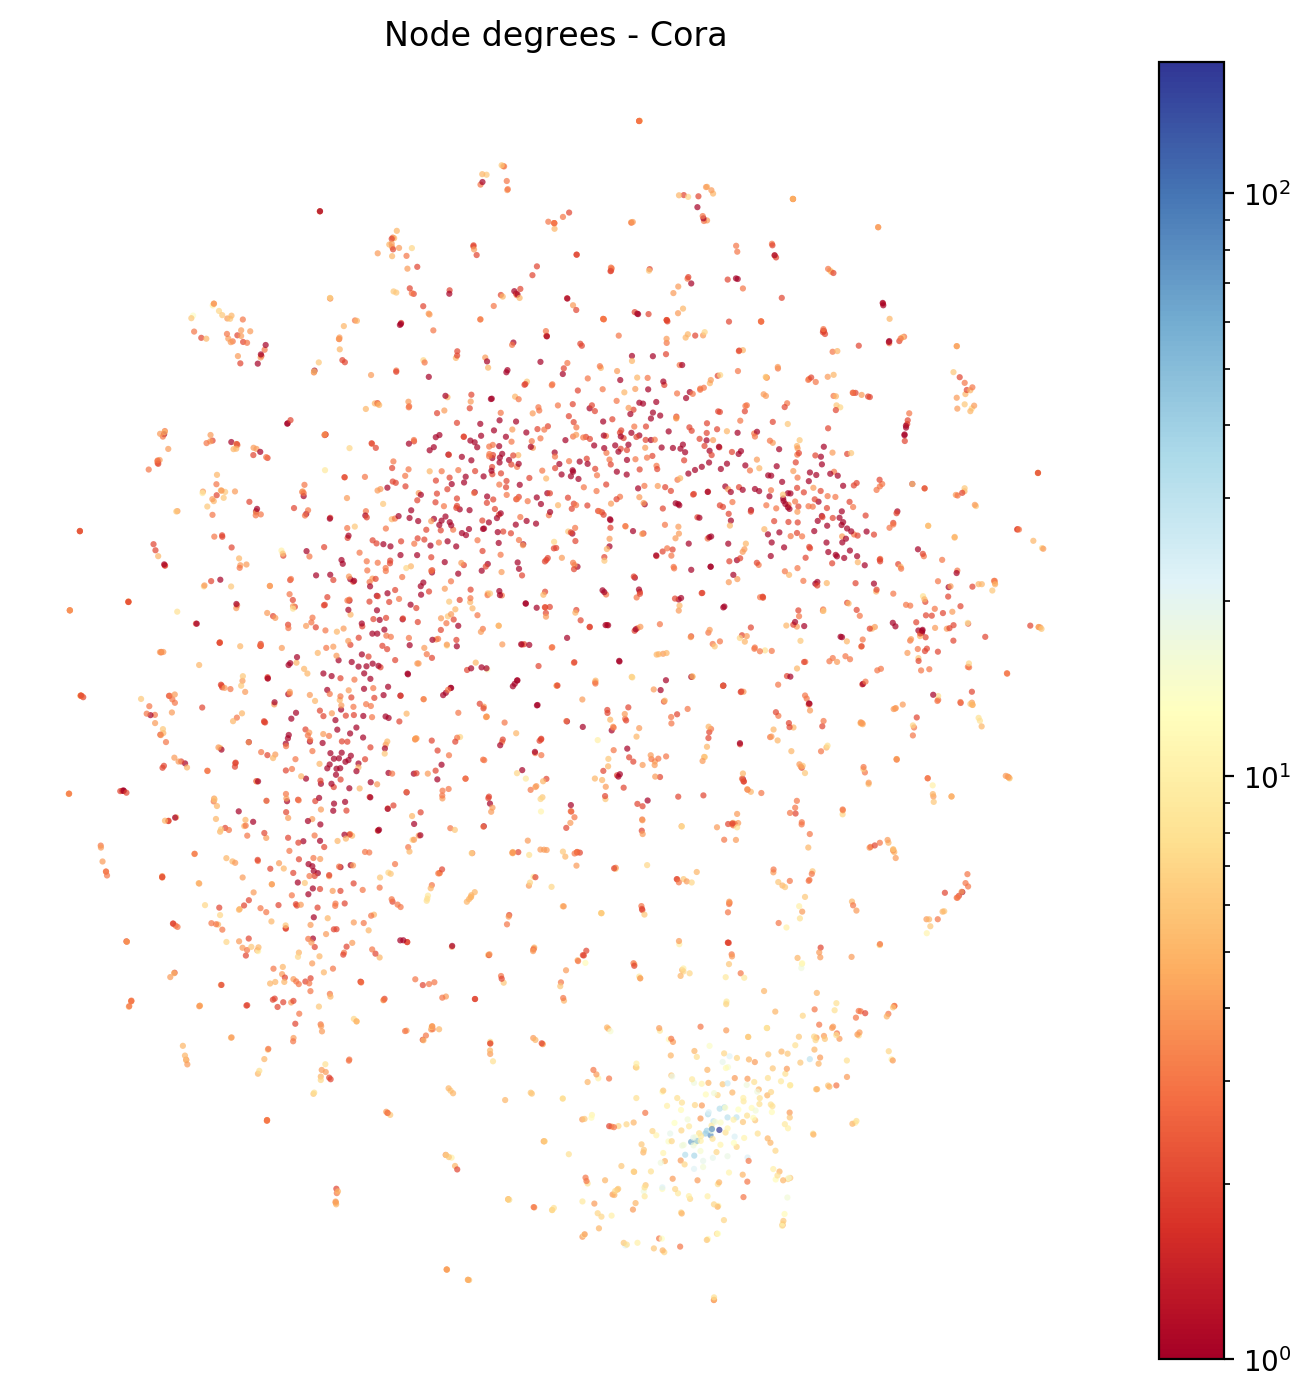

In [19]:
visualizer.plot_node_degrees()

(<Figure size 1400x1400 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8538289d90>)

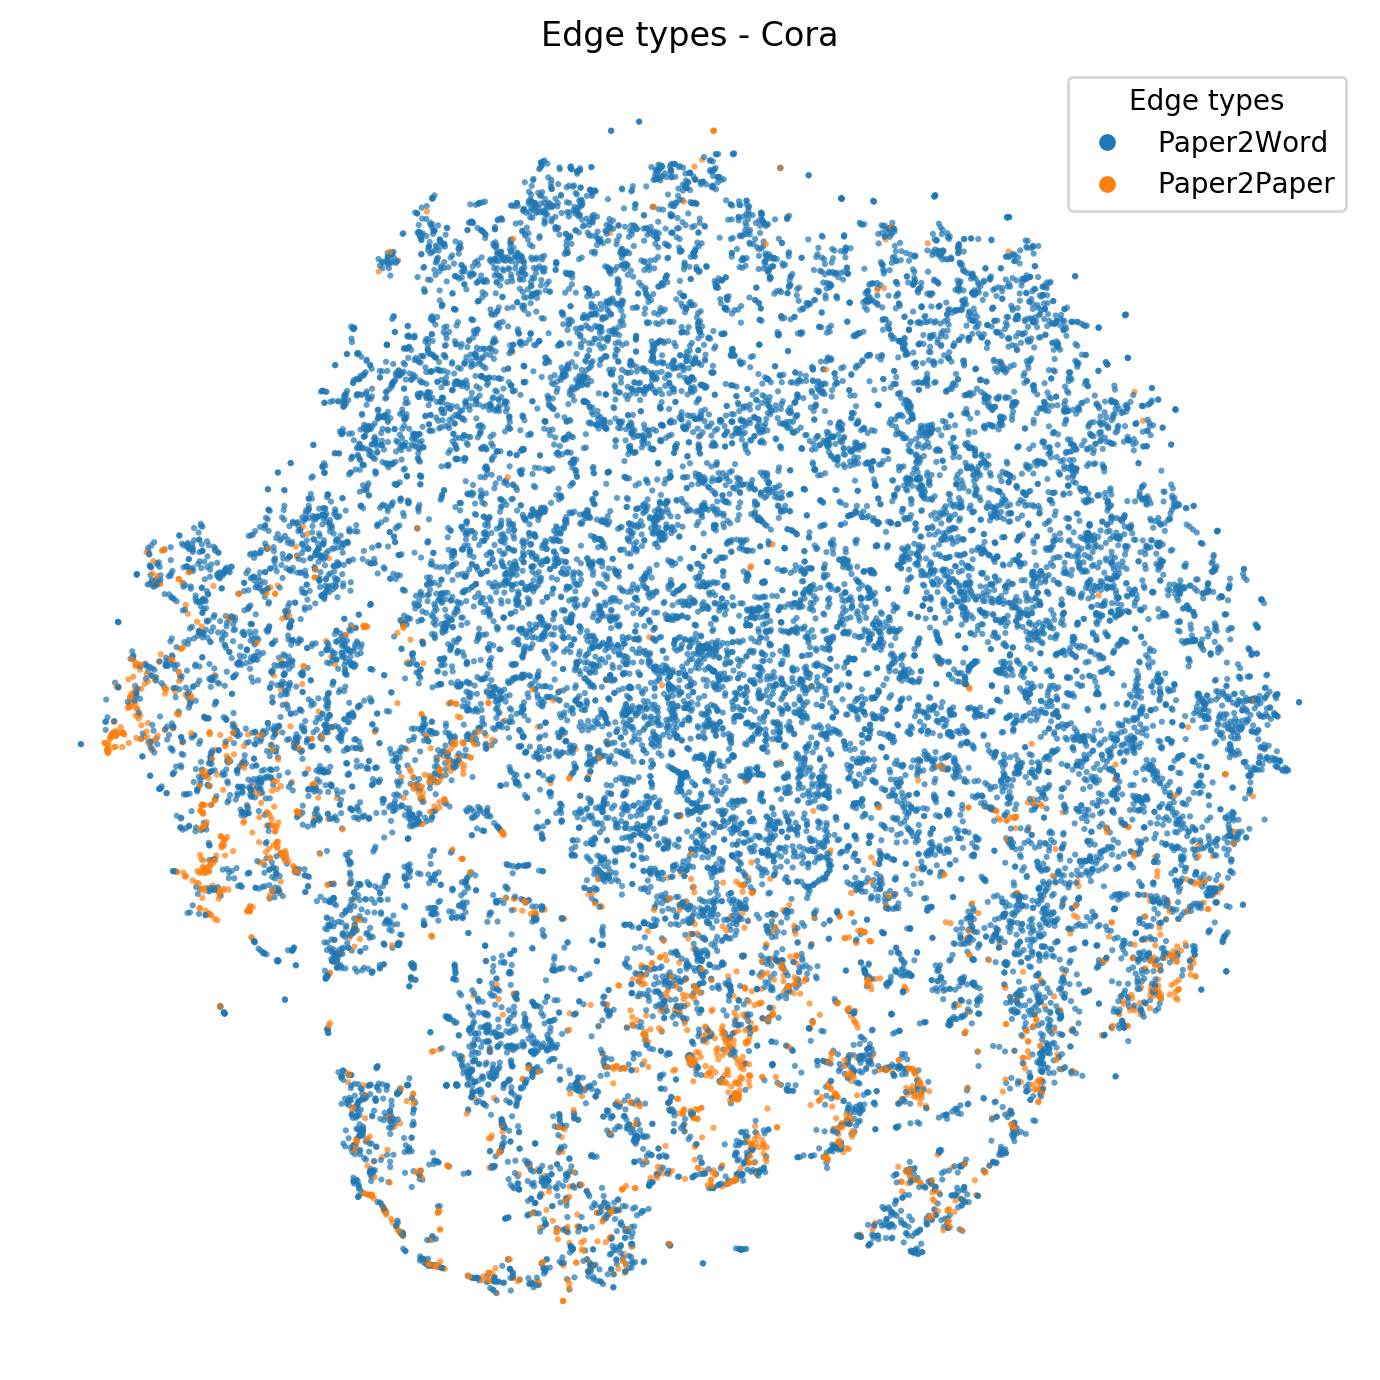

In [24]:
visualizer.plot_edge_types()